In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_df = pd.read_csv(r"C:\Users\jefil\Downloads\Bicycle_Thefts.csv")

C:\Users\jefil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Exploration

In [3]:
data_df.head()

,X,Y,OBJECTID,event_unique_id,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,...,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude,ObjectId2
0,-8.850630e+06,5.411196e+06,17744,GO-20179016397,THEFT UNDER,2017/10/03 04:00:00+00,2017,October,Tuesday,3,...,GI,ESCAPE 2,OT,7,BLK,700.0,STOLEN,-79.506560,43.648427,1
1,-8.850439e+06,5.412149e+06,17759,GO-20172033056,THEFT UNDER - BICYCLE,2017/11/08 05:00:00+00,2017,November,Wednesday,8,...,UNKNOWN MAKE,NaN,TO,1,BLK,1100.0,RECOVERED,-79.504849,43.654623,2
2,-8.851203e+06,5.411169e+06,17906,GO-20189030822,THEFT UNDER - BICYCLE,2018/09/14 04:00:00+00,2018,September,Friday,14,...,OT,CROSSTRAIL,MT,24,BLK,904.0,STOLEN,-79.511709,43.648253,3
3,-8.851203e+06,5.411169e+06,17962,GO-2015804467,THEFT UNDER,2015/05/07 04:00:00+00,2015,May,Thursday,7,...,GT,NaN,TO,10,BLKDGR,400.0,STOLEN,-79.511709,43.648253,4
4,-8.851160e+06,5.411032e+06,17963,GO-20159002781,THEFT UNDER,2015/05/16 04:00:00+00,2015,May,Saturday,16,...,GI,NaN,MT,6,RED,600.0,STOLEN,-79.511327,43.647364,5


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25569 entries, 0 to 25568
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X                      25569 non-null  float64
 1   Y                      25569 non-null  float64
 2   OBJECTID               25569 non-null  int64  
 3   event_unique_id        25569 non-null  object 
 4   Primary_Offence        25569 non-null  object 
 5   Occurrence_Date        25569 non-null  object 
 6   Occurrence_Year        25569 non-null  int64  
 7   Occurrence_Month       25569 non-null  object 
 8   Occurrence_DayOfWeek   25569 non-null  object 
 9   Occurrence_DayOfMonth  25569 non-null  int64  
 10  Occurrence_DayOfYear   25569 non-null  int64  
 11  Occurrence_Hour        25569 non-null  int64  
 12  Report_Date            25569 non-null  object 
 13  Report_Year            25569 non-null  int64  
 14  Report_Month           25569 non-null  object 
 15  Re

In [5]:
data_df.drop(columns=['X', 'Y','OBJECTID','event_unique_id','ObjectId2', 'Occurrence_Date'], axis=1, inplace=True)

In [6]:
data_df.isna().sum()

Primary_Offence             0
Occurrence_Year             0
Occurrence_Month            0
Occurrence_DayOfWeek        0
Occurrence_DayOfMonth       0
Occurrence_DayOfYear        0
Occurrence_Hour             0
Report_Date                 0
Report_Year                 0
Report_Month                0
Report_DayOfWeek            0
Report_DayOfMonth           0
Report_DayOfYear            0
Report_Hour                 0
Division                    0
City                        0
Hood_ID                     0
NeighbourhoodName           0
Location_Type               0
Premises_Type               0
Bike_Make                 121
Bike_Model               9646
Bike_Type                   0
Bike_Speed                  0
Bike_Colour              2061
Cost_of_Bike             1744
Status                      0
Longitude                   0
Latitude                    0
dtype: int64

In [7]:
data_df['Cost_of_Bike'] = data_df['Cost_of_Bike'].fillna(data_df['Cost_of_Bike'].mean())

In [8]:
data_df['Bike_Make'] = data_df.fillna(data_df['Bike_Make'].value_counts().index[0])
data_df['Bike_Model'] = data_df.fillna(data_df['Bike_Model'].value_counts().index[0])
data_df['Bike_Colour'] = data_df.fillna(data_df['Bike_Colour'].value_counts().index[0])

In [9]:
data_df.isna().sum()

Primary_Offence          0
Occurrence_Year          0
Occurrence_Month         0
Occurrence_DayOfWeek     0
Occurrence_DayOfMonth    0
Occurrence_DayOfYear     0
Occurrence_Hour          0
Report_Date              0
Report_Year              0
Report_Month             0
Report_DayOfWeek         0
Report_DayOfMonth        0
Report_DayOfYear         0
Report_Hour              0
Division                 0
City                     0
Hood_ID                  0
NeighbourhoodName        0
Location_Type            0
Premises_Type            0
Bike_Make                0
Bike_Model               0
Bike_Type                0
Bike_Speed               0
Bike_Colour              0
Cost_of_Bike             0
Status                   0
Longitude                0
Latitude                 0
dtype: int64

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [17]:
data_df = data_df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
data_df

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,Report_Date,Report_Year,Report_Month,...,Premises_Type,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude
0,54,10,2,5,15,108,20,344,3,2,...,5,54,54,7,50,54,1191,1,4671,5658
1,55,10,11,6,22,154,9,384,3,11,...,3,55,55,2,1,55,805,0,4647,311
2,55,11,3,0,26,85,16,719,4,3,...,6,55,55,6,9,55,170,1,4747,5646
3,54,8,10,4,21,235,2,1857,1,10,...,6,54,54,2,12,54,873,1,4747,5646
4,54,8,10,2,28,302,18,1860,1,10,...,6,54,54,6,44,54,1095,1,4741,5567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25564,27,8,0,6,0,287,23,1810,1,0,...,5,27,27,10,0,27,1095,1,602,5297
25565,54,9,10,1,28,303,6,2259,2,10,...,3,54,54,7,56,54,164,1,646,5313
25566,54,9,8,2,18,326,7,2283,2,8,...,0,54,54,6,9,54,1191,1,1469,5173
25567,54,9,7,1,18,362,5,2312,2,7,...,1,54,54,11,1,54,736,1,324,5228


In [12]:
data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Primary_Offence,25569.0,53.819625,13.755125,0.0,58.0,58.0,59.0,65.0
Occurrence_Year,25569.0,8.124174,1.960127,0.0,7.0,8.0,10.0,11.0
Occurrence_Month,25569.0,5.954828,3.532739,0.0,3.0,6.0,9.0,11.0
Occurrence_DayOfWeek,25569.0,2.988502,2.034344,0.0,1.0,3.0,5.0,6.0
Occurrence_DayOfMonth,25569.0,14.445422,8.980397,0.0,7.0,14.0,22.0,30.0
Occurrence_DayOfYear,25569.0,146.058547,85.850935,0.0,80.0,136.0,198.0,365.0
Occurrence_Hour,25569.0,10.497321,6.668070,0.0,5.0,10.0,15.0,23.0
Report_Date,25569.0,1286.670226,698.798690,0.0,701.0,1286.0,1920.0,2467.0
Report_Year,25569.0,3.143572,1.955024,0.0,2.0,3.0,5.0,6.0
Report_Month,25569.0,5.967421,3.545641,0.0,3.0,6.0,9.0,11.0


In [13]:
data_df.skew()

Primary_Offence          -2.880798
Occurrence_Year          -0.085482
Occurrence_Month         -0.178048
Occurrence_DayOfWeek     -0.002666
Occurrence_DayOfMonth     0.111061
Occurrence_DayOfYear      0.570660
Occurrence_Hour           0.318362
Report_Date              -0.061246
Report_Year              -0.076257
Report_Month             -0.175179
Report_DayOfWeek         -0.078100
Report_DayOfMonth         0.085342
Report_DayOfYear          0.544834
Report_Hour               0.732844
Division                 -0.328227
City                    -53.276011
Hood_ID                  -1.464314
NeighbourhoodName        -0.138712
Location_Type            -0.519982
Premises_Type            -0.234224
Bike_Make                -2.880798
Bike_Model               -2.880798
Bike_Type                 0.459357
Bike_Speed                1.449005
Bike_Colour              -2.880798
Cost_of_Bike             -0.216905
Status                    1.012447
Longitude                 0.356906
Latitude            

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_df)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.892308,0.727273,0.909091,0.833333,0.733333,0.536986,0.260870,0.529793,0.500000,0.909091,...,0.833333,0.892308,0.892308,0.333333,0.843750,0.892308,0.805601,0.5,0.894565,0.147772
1,0.907692,0.727273,0.818182,1.000000,0.966667,0.649315,0.739130,0.544386,0.500000,0.818182,...,0.500000,0.907692,0.907692,0.833333,0.015625,0.907692,0.051895,0.0,0.890953,0.219852
2,0.907692,0.818182,1.000000,0.000000,0.166667,0.479452,1.000000,0.666802,0.666667,1.000000,...,1.000000,0.907692,0.907692,0.250000,0.265625,0.907692,0.947282,0.5,0.906433,0.145880
3,0.892308,0.545455,0.727273,0.666667,0.933333,0.084932,0.434783,0.182002,0.166667,0.727273,...,1.000000,0.892308,0.892308,0.833333,0.031250,0.892308,0.569193,0.5,0.906433,0.145880
4,0.892308,0.545455,0.727273,0.333333,0.233333,0.112329,0.173913,0.182813,0.166667,0.727273,...,1.000000,0.892308,0.892308,0.250000,0.765625,0.892308,0.733937,0.5,0.905573,0.133666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25564,0.507692,0.545455,0.000000,1.000000,0.000000,0.978082,0.391304,0.164572,0.166667,0.000000,...,0.833333,0.507692,0.507692,0.583333,0.000000,0.507692,0.733937,0.5,0.026488,0.991915
25565,0.892308,0.636364,0.727273,0.166667,0.233333,0.115068,0.608696,0.328334,0.333333,0.727273,...,0.500000,0.892308,0.892308,0.333333,0.093750,0.892308,0.943163,0.5,0.027176,0.994323
25566,0.892308,0.636364,0.545455,0.333333,0.833333,0.172603,0.652174,0.337252,0.333333,0.545455,...,0.000000,0.892308,0.892308,0.250000,0.265625,0.892308,0.805601,0.5,0.039904,0.972648
25567,0.892308,0.636364,0.454545,0.166667,0.833333,0.263014,0.565217,0.348196,0.333333,0.454545,...,0.166667,0.892308,0.892308,0.666667,0.015625,0.892308,0.467875,0.5,0.022188,0.981077


In [15]:
corr = data_df.corr()
corr

,Primary_Offence,Occurrence_Year,Occurrence_Month,Occurrence_DayOfWeek,Occurrence_DayOfMonth,Occurrence_DayOfYear,Occurrence_Hour,Report_Date,Report_Year,Report_Month,...,Premises_Type,Bike_Make,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Longitude,Latitude
Primary_Offence,1.000000,-0.053367,0.007945,0.010853,0.020669,-0.060866,0.007260,-0.052650,-0.054030,0.006601,...,0.114099,1.000000,1.000000,0.044383,0.080078,1.000000,-0.034715,-0.071681,-0.010577,-0.026277
Occurrence_Year,-0.053367,1.000000,-0.009650,-0.001574,0.005683,0.050696,-0.017218,0.991667,0.996123,-0.007629,...,-0.111355,-0.053367,-0.053367,0.071689,0.049856,-0.053367,-0.042888,-0.002328,0.011495,-0.008756
Occurrence_Month,0.007945,-0.009650,1.000000,0.019345,-0.000433,0.155857,0.018085,0.026023,-0.011582,0.861213,...,0.007648,0.007945,0.007945,0.002177,0.007941,0.007945,0.004397,0.002926,-0.001928,-0.004767
Occurrence_DayOfWeek,0.010853,-0.001574,0.019345,1.000000,-0.008739,0.005648,0.035585,-0.000425,-0.001188,0.014854,...,0.010375,0.010853,0.010853,-0.003433,0.001210,0.010853,0.000735,0.000967,-0.009064,0.012158
Occurrence_DayOfMonth,0.020669,0.005683,-0.000433,-0.008739,1.000000,0.078632,0.007701,0.002528,0.002985,0.005128,...,0.018527,0.020669,0.020669,-0.003200,-0.001992,0.020669,-0.004773,-0.009744,0.007303,0.007531
Occurrence_DayOfYear,-0.060866,0.050696,0.155857,0.005648,0.078632,1.000000,-0.007239,0.086248,0.058672,0.121494,...,-0.028289,-0.060866,-0.060866,-0.001850,-0.019782,-0.060866,-0.014897,0.010124,0.000276,-0.011038
Occurrence_Hour,0.007260,-0.017218,0.018085,0.035585,0.007701,-0.007239,1.000000,-0.018850,-0.020607,0.012679,...,0.023141,0.007260,0.007260,0.013719,-0.002923,0.007260,0.006073,0.000047,-0.003953,-0.019536
Report_Date,-0.052650,0.991667,0.026023,-0.000425,0.002528,0.086248,-0.018850,1.000000,0.993986,0.024991,...,-0.111123,-0.052650,-0.052650,0.071939,0.049986,-0.052650,-0.043039,-0.000212,0.009627,-0.008550
Report_Year,-0.054030,0.996123,-0.011582,-0.001188,0.002985,0.058672,-0.020607,0.993986,1.000000,-0.011783,...,-0.114392,-0.054030,-0.054030,0.072597,0.049065,-0.054030,-0.043292,-0.002546,0.011722,-0.008712
Report_Month,0.006601,-0.007629,0.861213,0.014854,0.005128,0.121494,0.012679,0.024991,-0.011783,1.000000,...,0.007111,0.006601,0.006601,0.000246,0.006352,0.006601,0.000635,0.000752,-0.003865,-0.004302


<AxesSubplot:>

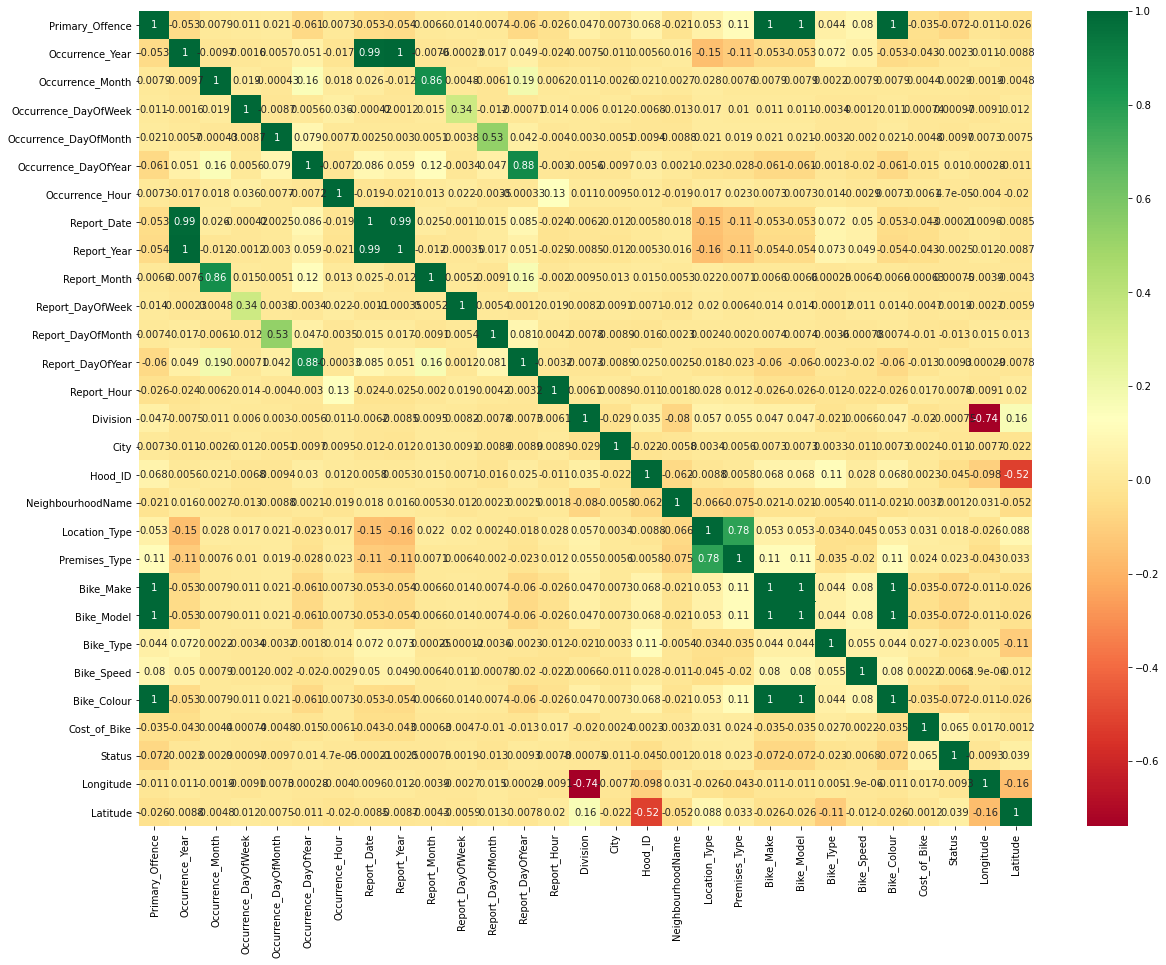

In [16]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True,cmap="RdYlGn")